<a href="https://colab.research.google.com/github/HarikaSatti06112001/Data-Mining/blob/main/CMPE255_A3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALLING APACHE BEAM
!pip install -q -U \
  tensorflow==2.0.0 \
  apache-beam


In [ ]:
import apache_beam as beam
import tensorflow as tf
from apache_beam import Create
from apache_beam import coders
from apache_beam.io.filesystem import CompressionTypes
from apache_beam.io.tfrecordio import ReadFromTFRecord
from apache_beam.io.tfrecordio import WriteToTFRecord


In [ ]:
print('version of TensorFlow: {}'.format(tf.__version__))
print('version of Beam: {}'.format(beam.__version__))

version of TensorFlow: 2.0.0
version of Beam: 2.41.0


In [ ]:
p = beam.Pipeline()

example = (p
           |"START">>beam.Create(['APACHE-BEAM Initiating', 'First', 'Lets Try'])
)
           
example | beam.Map(print)
result = p.run()
result.state

APACHE-BEAM Initiating
First
Lets Try


'DONE'

In [ ]:
from apache_beam.runners.interactive.display import pipeline_graph
import graphviz

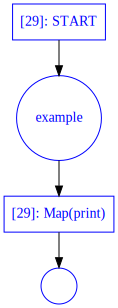

In [ ]:
def display_pipeline(pipeline):
  graph = pipeline_graph.PipelineGraph(pipeline)
  return graphviz.Source(graph.get_dot())

display_pipeline(p)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


True
False
True
False
True
False
True
False
True
False
True
False
False
True
True
False
True


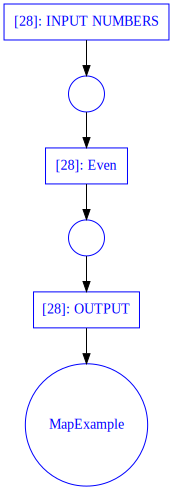

In [ ]:
input = [0,23,32,63,4,65,86,17,8,29,54,87,33,12,72,79,54]
with beam.Pipeline() as pipelineMap:
  MapExample = (
    pipelineMap
    |"INPUT NUMBERS">> beam.Create(input)
    |"Even ">> beam.Map(lambda x:x%2==0)
    |"OUTPUT">> beam.Map(print)
)
display_pipeline(pipelineMap)

50
100
150
200
250


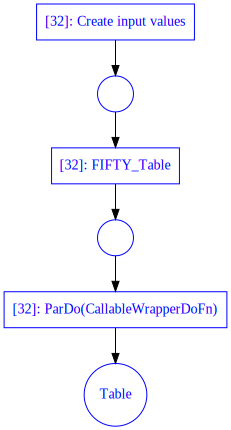

In [ ]:
class FIFTY_Table(beam.PTransform):
  def expand(self, pcollection):
    return(pcollection
      | beam.FlatMap(lambda line:line.split(","))
      | beam.Map(lambda num: int(num)*50)
    )
  


with beam.Pipeline() as pipeline2:
  Table = (pipeline2
            | "Create input values">> beam.Create(['1,2,3,4,5'])
            | FIFTY_Table()
            | beam.ParDo(print))
display_pipeline(pipeline2)

1
2
2
3
3
3
4
4
4
4
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8


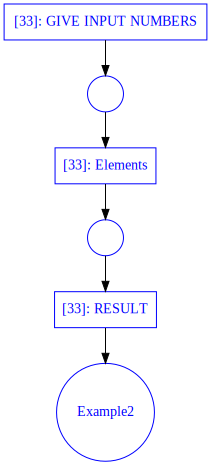

In [ ]:
input = [1,2,3,4,5,6,7,8]
with beam.Pipeline() as pipelineFlatMap:
  Example2 = (
    pipelineFlatMap
    |"GIVE INPUT NUMBERS">> beam.Create(input)
    |"Elements">> beam.FlatMap(lambda x: [x for i in range(x)])
    |"RESULT">> beam.Map(print)
)
display_pipeline(pipelineFlatMap)

1
3
5
7
9


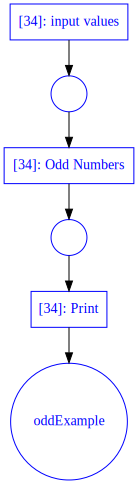

In [ ]:
input = [0,1,2,3,4,5,6,7,8,9]
with beam.Pipeline() as pipelineFilter:
  oddExample = (
    pipelineFilter
    |"input values">> beam.Create(input)
    |"Odd Numbers">> beam.Filter(lambda x:x%2!=0)
    |"Print">> beam.Map(print)
)
display_pipeline(pipelineFilter)

In [ ]:
class CustomTransform(beam.PTransform):
  
  def expand(self, input_coll):
    
    a = ( 
        input_coll
                       | 'SUM' >> beam.CombinePerKey(sum)
                       | 'SORT' >> beam.Filter(filter_on_count)
                       | 'SURVIVORS' >> beam.Map(format_output)
              
    )
    return a



p = beam.Pipeline()

input_collection = ( 
                      p 
                      | "Read from csv file" >> beam.dataframe.io.read_csv('/content/creditcard.csv')
                      | "Split rows" >> beam.Map(SplitRow)
                   )
p.run()

In [ ]:
p1 = beam.Pipeline()
visit_count = (
 
  p1
  |beam.io.ReadFromText('/content/creditcard.csv')

  |beam.Map(lambda record: record.split(','))
  |beam.Filter(lambda record: record[3] == 'amount')
  |beam.Map(lambda record: (record[1], 1))
  |beam.CombinePerKey(sum)
 
  |beam.io.WriteToText('out_data.txt')
)

p1.run()